Points I think I deserve:
1. Problem               2/2
2. Data Prep             2/2
3. Research              7/10
4. Analysis              9/10
5. Bumps in the Road     1/1

Total                    21/25



1. Problem [2 points]: State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict. Is the problem a regression or a classification? What kind of metric do you plan to use to measure the performance of your model?

The problem I am trying to solve with this machine learning experiement, is determining the number of wins a team earned in the 2023 season, using their statistics from the games they played.

The dataset I am using for this machine learning project, exported from Kaggle, includes statistics for each college basketball team in the NCAA from the past 10 years or so (not including the 2020 season as there was no postseason for many NCAA teams). Some statistics that are presented in the dataset include: name of the team, conference, number of games played, number of games won, and other game-specific statistics (offensive/defensive efficiency, turnover rate, etc.). The problem I am focusing on will be done using classification with a target variable of 'W' (a categorical target value). The metric I will be using to measure the performance of my model will be the accuracy score.

I am trying to predict the amount of games each basketball team won in a single season using the team statistics.

2. Data Preparation [2 points]: Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

To prepare my data, I dropped columns that I felt made the dataset too loud, and did not have importance to the overall goal I was trying to achieve. From here I renamed certain columns, so that others could understand what each column was describing, and to make it easier to work with. I also made sure none of the rows included missing data, or data that was not in the correct format I needed.



In [ ]:
# load and preapre your data here:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
path = '/content/drive/MyDrive/CS167/datasets/cbb23.csv'
cbb = pd.read_csv(path)
cbb.head(15)


Mounted at /content/drive


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,Kansas,B12,36,28,113.8,92.3,0.9177,52.6,47.0,17.5,...,29.8,31.1,53.0,47.2,34.7,31.0,69.0,10.1,R32,1.0
1,Purdue,B10,35,29,117.9,93.7,0.9333,51.8,47.2,17.2,...,37.2,19.2,54.1,47.2,32.2,31.3,63.9,9.4,R64,1.0
2,Alabama,SEC,37,31,116.1,89.0,0.9548,52.1,41.3,18.7,...,36.6,32.6,53.8,40.8,33.5,28.3,72.6,10.2,S16,1.0
3,Houston,Amer,37,33,117.3,90.3,0.9532,52.3,42.7,15.4,...,28.9,35.7,53.1,43.4,34.0,27.9,63.4,8.0,S16,1.0
4,Texas,B12,38,29,116.1,91.8,0.9371,53.3,48.1,16.3,...,30.5,33.7,54.0,47.9,34.7,32.4,68.5,7.5,E8,2.0
5,Marquette,BE,36,29,118.7,96.0,0.9197,56.0,51.0,15.3,...,27.0,29.1,58.2,50.3,35.3,34.7,68.4,7.8,R32,2.0
6,Arizona,P12,35,28,119.4,95.4,0.9292,56.5,47.1,18.4,...,35.8,25.5,56.4,46.2,37.8,32.3,72.2,7.6,R64,2.0
7,UCLA,P12,37,31,114.9,88.5,0.9528,51.1,46.8,14.9,...,27.4,27.5,50.6,46.9,34.9,31.1,66.1,8.4,S16,2.0
8,Kansas St.,B12,36,26,112.6,94.7,0.8803,52.3,48.1,19.3,...,36.1,36.3,52.8,49.2,34.3,30.8,69.8,4.2,E8,3.0
9,Gonzaga,WCC,36,31,123.2,99.0,0.9251,57.6,51.4,14.8,...,34.1,26.0,58.2,50.6,37.5,35.2,70.1,6.6,E8,3.0


In [ ]:
cbb23 = cbb[['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'TOR', 'FTR', '2P_O', '3P_O', 'WAB']]
cbb23.head(10)
cbb23.rename(columns={"G":"GAMES", "W":"WINS", "ADJOE":"OFF_EFF", "ADJDE":"DEF_EFF"})

,TEAM,CONF,GAMES,WINS,OFF_EFF,DEF_EFF,TOR,FTR,2P_O,3P_O,WAB
0,Kansas,B12,36,28,113.8,92.3,17.5,29.8,53.0,34.7,10.1
1,Purdue,B10,35,29,117.9,93.7,17.2,37.2,54.1,32.2,9.4
2,Alabama,SEC,37,31,116.1,89.0,18.7,36.6,53.8,33.5,10.2
3,Houston,Amer,37,33,117.3,90.3,15.4,28.9,53.1,34.0,8.0
4,Texas,B12,38,29,116.1,91.8,16.3,30.5,54.0,34.7,7.5
...,...,...,...,...,...,...,...,...,...,...,...
358,Toledo,MAC,34,27,119.9,109.6,13.6,34.4,54.6,39.7,-1.2
359,Liberty,ASun,33,27,111.4,97.3,16.0,26.2,56.4,36.4,-2.0
360,Utah Valley,WAC,34,28,107.1,94.6,19.3,35.6,52.5,33.4,-0.3
361,UAB,CUSA,38,29,112.4,97.0,17.3,35.7,48.8,35.6,-0.5


In [ ]:
cbb23_conf = pd.get_dummies(cbb23, columns = ["CONF"])
cbb23_conf.head()

,TEAM,G,W,ADJOE,ADJDE,TOR,FTR,2P_O,3P_O,WAB,...,CONF_Pat,CONF_SB,CONF_SC,CONF_SEC,CONF_SWAC,CONF_Slnd,CONF_Sum,CONF_WAC,CONF_WCC,CONF_ind
0,Kansas,36,28,113.8,92.3,17.5,29.8,53.0,34.7,10.1,...,0,0,0,0,0,0,0,0,0,0
1,Purdue,35,29,117.9,93.7,17.2,37.2,54.1,32.2,9.4,...,0,0,0,0,0,0,0,0,0,0
2,Alabama,37,31,116.1,89.0,18.7,36.6,53.8,33.5,10.2,...,0,0,0,1,0,0,0,0,0,0
3,Houston,37,33,117.3,90.3,15.4,28.9,53.1,34.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4,Texas,38,29,116.1,91.8,16.3,30.5,54.0,34.7,7.5,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cbb23.isna().any()


TEAM     False
CONF     False
G        False
W        False
ADJOE    False
ADJDE    False
TOR      False
FTR      False
2P_O     False
3P_O     False
WAB      False
dtype: bool

Research [10 points]: Put your code and your experiments here.
Your research should include using the models that we've talked about in class so far--namely, a K Nearest Neighbors, weighted kNN, Decision Tree, Random Forest, as well as tuning these models (with visuals, i.e. graphs) to find the parameters that give you the best performance using an appropriate metric.
Does normalizing your data lead to better performance? If so, why?

0.136986301369863
___PREDICTED___ 	  ___ACTUAL___
11 		 15
10 		 8
17 		 24
11 		 11
22 		 19
10 		 12
15 		 13
10 		 5
11 		 5
22 		 24
14 		 9
16 		 21
16 		 18
16 		 14
16 		 22
12 		 10
16 		 13
11 		 11
11 		 9
16 		 11
16 		 16
22 		 19
17 		 17
23 		 27
12 		 8
16 		 18
11 		 10
11 		 13
22 		 22
16 		 13
11 		 16
16 		 15
10 		 7
20 		 20
16 		 17
11 		 10
16 		 16
16 		 15
13 		 11
16 		 16
16 		 10
16 		 14
23 		 27
13 		 14
16 		 19
19 		 17
17 		 14
23 		 33
19 		 15
16 		 18
22 		 29
22 		 32
16 		 22
20 		 24
12 		 9
19 		 17
19 		 20
17 		 14
10 		 11
11 		 13
16 		 9
16 		 14
17 		 18
20 		 21
10 		 13
11 		 9
22 		 26
17 		 23
12 		 12
23 		 23
16 		 17
22 		 28
17 		 15


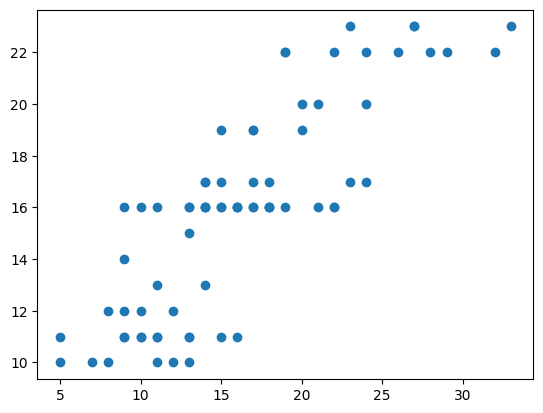

In [ ]:
from scipy.sparse import random
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

# KNN for classification
predictors = ["ADJOE", "ADJDE", "2P_O", "G", "TOR", "FTR", "WAB", "3P_O"]
target = "W"

# Split Data
train_data, test_data, train_sln, test_sln = \
      train_test_split(cbb23[predictors], cbb23[target], test_size = .2, random_state = 50)

KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 50)
KNN.fit(train_data, train_sln)
prediction = KNN.predict(test_data)
score = metrics.accuracy_score(test_sln, prediction)
print(score)

print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(len(test_sln)):
  print(prediction[i],"\t\t", test_sln.iloc[i])


import matplotlib.pyplot as plt
plt.scatter(x = test_sln,
            y = prediction)

0.1232876712328767
___PREDICTED___ 	  ___ACTUAL___
16 		 15
10 		 8
19 		 24
11 		 11
22 		 19
16 		 12
14 		 13
11 		 5
11 		 5
23 		 24
14 		 9
17 		 21
16 		 18
10 		 14
17 		 22
12 		 10
16 		 13
11 		 11
11 		 9
16 		 11
16 		 16
22 		 19
17 		 17
23 		 27
16 		 8
16 		 18
11 		 10
10 		 13
22 		 22
17 		 13
11 		 16
17 		 15
11 		 7
17 		 20
16 		 17
11 		 10
16 		 16
10 		 15
16 		 11
16 		 16
16 		 10
17 		 14
23 		 27
13 		 14
16 		 19
16 		 17
16 		 14
22 		 33
19 		 15
19 		 18
22 		 29
22 		 32
16 		 22
15 		 24
10 		 9
19 		 17
19 		 20
14 		 14
10 		 11
11 		 13
16 		 9
19 		 14
15 		 18
16 		 21
10 		 13
11 		 9
22 		 26
17 		 23
10 		 12
23 		 23
16 		 17
22 		 28
17 		 15


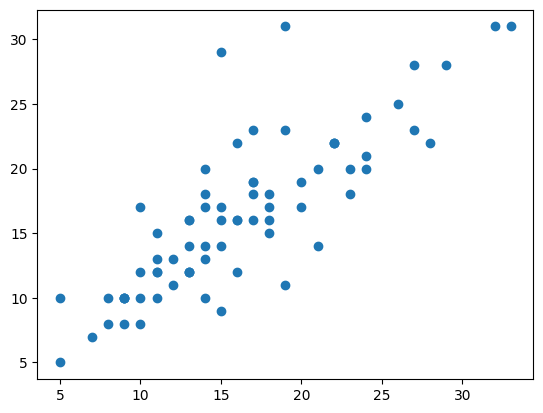

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

predictors = ["ADJOE", "ADJDE", "2P_O", "G", "TOR", "FTR", "WAB", "3P_O"]
target = "W"

# Split Data
train_data, test_data, train_sln, test_sln = \
      train_test_split(cbb23[predictors], cbb23[target], test_size = .2, random_state = 50)

KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 50)
KNN.fit(train_data_normalized, train_sln)
prediction_normalized = KNN.predict(test_data_normalized)
print(metrics.accuracy_score(test_sln, prediction_normalized))

print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(len(test_sln)):
    print(prediction_normalized[i],"\t\t", test_sln.iloc[i])

import matplotlib.pyplot as plt
plt.scatter(x = test_sln,
            y = prediction)


0.1643835616438356
___PREDICTED___ 	  ___ACTUAL___
11 		 15
10 		 8
17 		 24
11 		 11
22 		 19
10 		 12
15 		 13
10 		 5
11 		 5
23 		 24
14 		 9
16 		 21
16 		 18
16 		 14
16 		 22
12 		 10
16 		 13
11 		 11
10 		 9
16 		 11
16 		 16
22 		 19
17 		 17
23 		 27
12 		 8
16 		 18
11 		 10
11 		 13
22 		 22
16 		 13
11 		 16
16 		 15
10 		 7
20 		 20
16 		 17
10 		 10
16 		 16
16 		 15
13 		 11
16 		 16
17 		 10
17 		 14
23 		 27
13 		 14
16 		 19
19 		 17
17 		 14
31 		 33
19 		 15
16 		 18
22 		 29
22 		 32
16 		 22
20 		 24
12 		 9
19 		 17
19 		 20
17 		 14
10 		 11
11 		 13
17 		 9
16 		 14
17 		 18
20 		 21
13 		 13
11 		 9
22 		 26
19 		 23
12 		 12
23 		 23
16 		 17
22 		 28
17 		 15


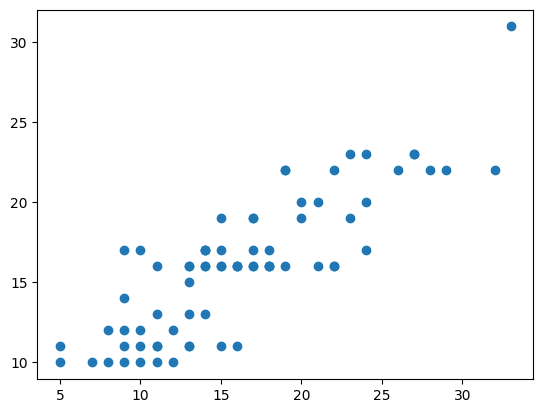

In [ ]:
# weighted KNN
predictors = ["ADJOE", "ADJDE", "2P_O", "G", "TOR", "FTR", "WAB", "3P_O"]
target = "W"

# Split Data
train_data, test_data, train_sln, test_sln = \
      train_test_split(cbb23[predictors], cbb23[target], test_size = .2, random_state = 50)

KNN_weighted = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 50, weights = "distance")
KNN_weighted.fit(train_data, train_sln)
prediction = KNN_weighted.predict(test_data)
print(metrics.accuracy_score(test_sln, prediction))

print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(len(test_sln)):
    print(prediction[i],"\t\t", test_sln.iloc[i])

import matplotlib.pyplot as plt
plt.scatter(x = test_sln,
            y = prediction)

0.136986301369863
___PREDICTED___ 	  ___ACTUAL___
16 		 15
10 		 8
19 		 24
11 		 11
22 		 19
16 		 12
17 		 13
11 		 5
11 		 5
23 		 24
14 		 9
17 		 21
18 		 18
13 		 14
17 		 22
12 		 10
16 		 13
16 		 11
11 		 9
16 		 11
16 		 16
22 		 19
17 		 17
23 		 27
16 		 8
16 		 18
11 		 10
10 		 13
22 		 22
17 		 13
11 		 16
17 		 15
11 		 7
17 		 20
16 		 17
11 		 10
16 		 16
15 		 15
16 		 11
16 		 16
16 		 10
17 		 14
23 		 27
13 		 14
16 		 19
17 		 17
16 		 14
31 		 33
19 		 15
19 		 18
22 		 29
22 		 32
17 		 22
15 		 24
11 		 9
19 		 17
19 		 20
17 		 14
13 		 11
11 		 13
16 		 9
20 		 14
15 		 18
16 		 21
10 		 13
11 		 9
22 		 26
17 		 23
10 		 12
23 		 23
16 		 17
22 		 28
17 		 15


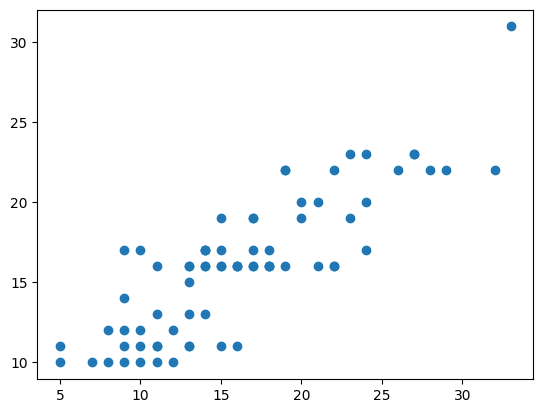

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

predictors = ["ADJOE", "ADJDE", "2P_O", "G", "TOR", "FTR", "WAB", "3P_O"]
target = "W"

# Split Data
train_data, test_data, train_sln, test_sln = \
      train_test_split(cbb23[predictors], cbb23[target], test_size = .2, random_state = 50)

KNN_weighted_norm = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 50, weights = "distance")
KNN_weighted_norm.fit(train_data_normalized, train_sln)
prediction_normalized = KNN_weighted_norm.predict(test_data_normalized)
print(metrics.accuracy_score(test_sln, prediction_normalized))

print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(len(test_sln)):
    print(prediction_normalized[i],"\t\t", test_sln.iloc[i])

import matplotlib.pyplot as plt
plt.scatter(x = test_sln,
            y = prediction)

accuracy score:  0.1506849315068493


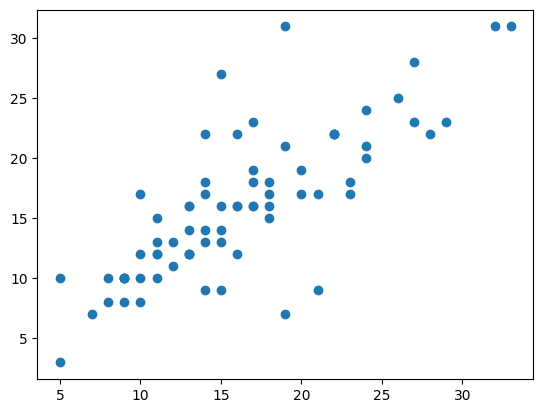

In [ ]:
# decision tree classifier
from sklearn import tree
from sklearn import metrics

dt = tree.DecisionTreeClassifier()
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)

print("accuracy score: ", metrics.accuracy_score(test_sln,prediction))

import matplotlib.pyplot as plt
plt.scatter(x = test_sln,
            y = prediction)

accuracy score:  0.1506849315068493


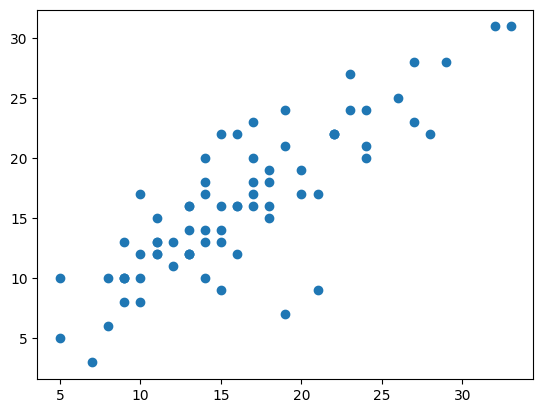

In [ ]:
# normalized decision tree
dt = tree.DecisionTreeClassifier()
dt.fit(train_data_normalized, train_sln)
prediction = dt.predict(test_data_normalized)

print("accuracy score: ", metrics.accuracy_score(test_sln,prediction))

import matplotlib.pyplot as plt
plt.scatter(x = test_sln,
            y = prediction)

accuracy score:  0.1780821917808219


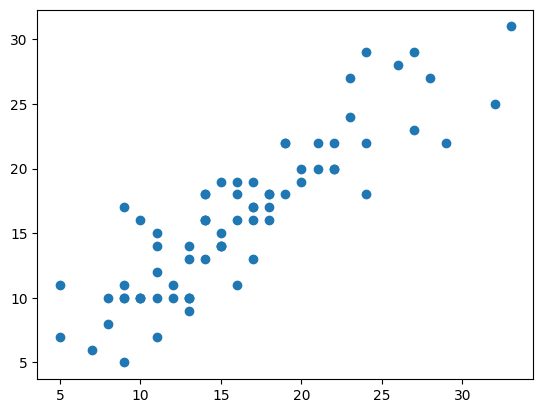

In [ ]:
# random forest tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(random_state = 0)
forest.fit(train_data,train_sln)
prediction = forest.predict(test_data)
print("accuracy score: ", metrics.accuracy_score(test_sln,prediction))

import matplotlib.pyplot as plt
plt.scatter(x = test_sln,
            y = prediction)

accuracy score:  0.1643835616438356


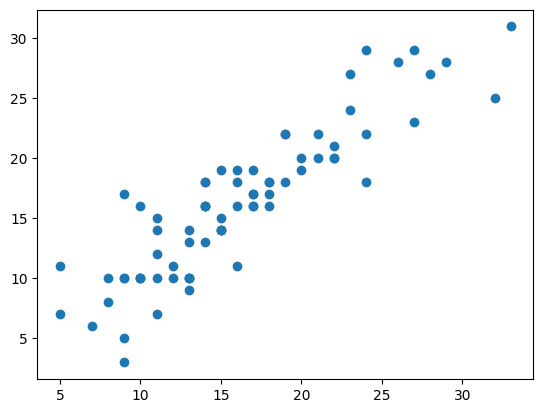

In [ ]:
# normalized random forest
forest = RandomForestClassifier(random_state = 0)
forest.fit(train_data_normalized,train_sln)
prediction = forest.predict(test_data_normalized)
print("accuracy score: ", metrics.accuracy_score(test_sln,prediction))

import matplotlib.pyplot as plt
plt.scatter(x = test_sln,
            y = prediction)

**Analysis [10 points]: What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.**


Through these experiments, I learned that this dataset is not helpful in determining the amount of wins a team earns in a season. Using statistics from these games did not turn out to be a good predictor of games won, as the overall average score from these tests ranged from 12% - 18%. The best predictor model I found in this experiment would be the random forest and the normalized random forest/weighted kNN, as the random forest had a 17.8% accuracy score and the normalized random forest/weighted kNN had a 16.4% accuracy score. After I did this test, I returned the actual and predicted games won to compare the results, and you could see there was a large margin of error within the data.
Some insights or recommendations that I have would be to make sure the data being used is for determining a certain variable, or chose another variable to predict. Additionally, if I had more time I would honestly redo the project to see if approaching it as a regression problem would be better or include a graph that explains a little bit more about the data, such as a confusion matrix.
Some things that I found interesting was that the overall accuracy of this data was not good, and that team statistics are not the best predictor in determining whether a team won a game or not. There are other pieces of information that determine this, that were either outliers, or were not a part of this dataset.
As stated above, the model that worked best for me was the random forest model and the normalized random forest/weighted kNN model, with a 17.8% accuracy score and 16.4% accuracy score, respectively. The model that did not work well for me was the unweighted kNN, with an accuracy score of 12%. I think this is because each statistic was already determined in a certain way, and changing this variable changed every statistic. These are real time statistics, and not a regression, in which I feel works better with normalized data.



**Bumps in the Road [1 point]: What challenges did you encounter? How did you overcome these challenges?**


A few early challenges at the onset of the project included trying to display the names of the teams at first with the wins. From here on, I had to dumb it down to not include the full set of information I wanted. I also had trouble creating the graphs, as I wanted to make them more extravagent, but I had to dumb it down as well. A few of the graphs are not as insightful as I would've wanted (as in, the information given from the graph was not necessarily helpful). I wanted my graphs to display the names of each team, but without being able to match up the game win predicted and actual vales to a team, I could not do this.
Overall the challenges I faced were due to myself wanting to add more to the experiement, with things we haven't fully learned. If I had more time, I would retry this project from a regression standpoint and include other features, such as a confusion matrix, to hopefully build a more predictive model.